In [18]:
%matplotlib notebook

In [19]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9, 6)
plt.close('all')

In [20]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1) 
when = yesterday.strftime("%Y-%m-%d")

what = {
    "ITA": 0,
    "FRA": 0,
    "GBR": 0,
    "ESP": 0,
    "DEU": 0,
    "NLD": 0,
}

In [21]:
url = r"https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx".format(when)
excel = requests.get(url)

try:
    data = pd.read_excel(excel.content)
except:
    msg = "ERROR: Excel data not available for {}".format(when)
    raise SystemExit(msg)
    

print (data.columns)
print (pd.unique(data["countryterritoryCode"]))

with open('data_{}.xlsx'.format(when), 'wb') as ofp:
    ofp.write(excel.content)

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')
['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN'
 'CPV' nan 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV'
 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FLK' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF'
 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GGY'
 'GIN' 'GNB' 'GUY' 'HTI' 'VAT' 'HND' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ'
 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN' 'JEY' 'JOR' 'KAZ' 'KEN' 'XKX' 'KWT'
 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MDG' 'MWI'
 'MYS' 'MDV' '

<IPython.core.display.Javascript object>


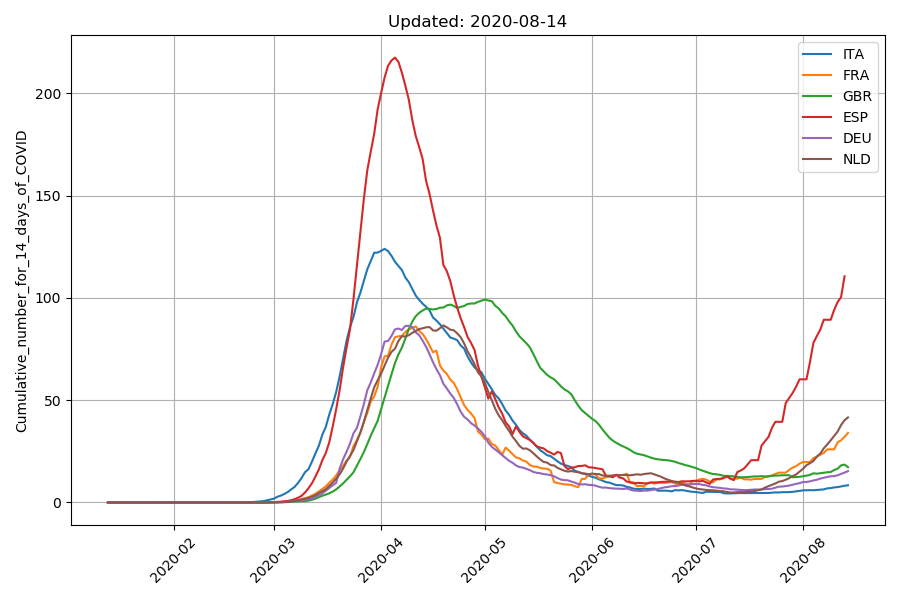

In [22]:
for country in what:
    shift = what[country]
    country_data =  data[data["countryterritoryCode"] == country]
    plt.plot(country_data['dateRep'] + datetime.timedelta(days=shift), 
             country_data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], 
             label=country)

plt.title("Updated: {}".format(when))
plt.xticks(rotation=45)
plt.ylabel('Cumulative_number_for_14_days_of_COVID')
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.show()
